# OrganAIZ
## Agente de manejo de tiempo.

### Instalación de librerías:

Para la correcta ejecucion del proyecto primero se deberan de instalar las librerias usadas para la implementacion del mismo.

In [ ]:
!virtualenv temp
#!virtualenv -p python3.6 temp
!source temp/bin/activate

!pip install anytree pandas
!pip install pytholog
!apt install swi-prolog
!pip install pykeen
!pip install -U scikit-fuzzy
!pip install sklearn
!pip install matplotlib
!pip install SpeechRecognition
!pip install tweepy
!pip install google-auth
!pip install google-auth-oauthlib
!pip install google-auth-httplib2
!pip install google-api-python-client
!pip install --upgrade google-api-python-client
!pip install ipywidgets
!pip install dash
!pip install streamlit
!pip install PySimpleGUI


created virtual environment CPython3.10.7.final.0-64 in 1383ms
  creator CPython3Posix(dest=/Users/makata/Documents/02_INTEL_ARTIFICIAL/PROYECTO/OrganAIz/temp, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/makata/Library/Application Support/virtualenv)
    added seed packages: pip==22.2.2, setuptools==65.3.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━

### Importación de librerías:

In [2]:
import ssl
import csv
import numpy as np
import pandas as pd
from anytree import NodeMixin, RenderTree
import pytholog as pl 
import datetime
import dateparser
import math
import itertools
import tweepy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse, silhouette_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import speech_recognition as sr
import ipywidgets as widgets

import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

import PySimpleGUI as sg




/var/folders/7x/wj3gltf13jj2hvvnn4shnz900000gn/T/ipykernel_9159/1434309829.py:27: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/7x/wj3gltf13jj2hvvnn4shnz900000gn/T/ipykernel_9159/1434309829.py:28: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Mac OS Version is 13.3.1 and patch enabled so applying the patch
Applyting Mac OS 12.3+ Alpha Channel fix.  Your default Alpha Channel is now 0.99


## Agregar nuevas tareas pendientes usando percepción de voz:

Vamos a agregar una funcionalidad al agente para que le puedas dictar una tarea y el agente la guarde como tarea y la añada al pool de tareas pendientes. 

Formato para guardar una nueva tarea:
- Name
- TaskType (El Id)
- AvgTime
- Urgency
- TimeStart
- Deadline
- Location
- IsHobby
- Recurrency
- BestOn
- Involves

Datos que asigna el agente:
- TaskID
- Parent

In [5]:

# Procesamiento de los audios.

r = sr.Recognizer()

audio_file_name = "./audio_files/tarea_nombre.wav"
audio_file_taskType = "./audio_files/taskType.wav"
audio_file_avgTime = "./audio_files/duracion.wav"
audio_file_urgency = "./audio_files/urgencia.wav"
audio_file_timeStart = "./audio_files/timeStart.wav"
audio_file_deadline = "./audio_files/deadline.wav"
audio_file_location = "./audio_files/location.wav"
audio_file_isHobby = "./audio_files/isHobby.wav"
audio_file_recurrency = "./audio_files/recurrency.wav"
audio_file_bestOn = "./audio_files/bestOn.wav"
audio_file_involves = "./audio_files/involves.wav"

# PARSING TASK NAME

with sr.AudioFile(audio_file_name) as source:
    audio = r.record(source)

taskName = r.recognize_google(audio, language="es-ES")

print("Nombre de la tarea: "+taskName)

# PARRSING DE TASKTYPE

with sr.AudioFile(audio_file_taskType) as source:
    audio = r.record(source)

taskType = r.recognize_google(audio, language="es-ES")
print(taskType)

# Revisamos que los datos capturados sean un digito numerico:
if taskType.isdigit():
    taskType = int(taskType)
else:
    print("La cadena no contiene solo números")

print(f"--> El ID de el tipo de tarea es {taskType}")


# PARSING DE AVGTIME

with sr.AudioFile(audio_file_avgTime) as source:
    audio = r.record(source)

taskAvgTime = r.recognize_google(audio, language="es-ES")
print(taskAvgTime)

# Revisamos que los datos capturados sean un digito numerico:
if taskAvgTime.isdigit():
    taskAvgTime = int(taskAvgTime)
else:
    print("La cadena no contiene solo números")

print(f"--> El tiempo promedio es {taskAvgTime} minutos")


# PARSING DE URGENCY

with sr.AudioFile(audio_file_urgency) as source:
    audio = r.record(source)

taskUrgency = r.recognize_google(audio, language="es-ES")
print(taskUrgency)

# Revisamos que los datos capturados sean un digito numerico:
if taskUrgency.isdigit():
    taskUrgency = int(taskUrgency)
else:
    print("La cadena no contiene solo números")

print(f"--> La urgencia es {taskUrgency}")



# PARSING DE TIME START

with sr.AudioFile(audio_file_timeStart) as source:
    audio = r.record(source)

tasktimeStart = r.recognize_google(audio, language="es-ES")
print(tasktimeStart)

# Conversion de la hora

# Convertir el texto en una hora legible por datetime.strptime()
dt_str = dateparser.parse(tasktimeStart).strftime("%H:%M")

# Convertir la hora en formato string a un objeto datetime
dt = datetime.datetime.strptime(dt_str, "%H:%M")


# Calcular los minutos transcurridos desde que inició el día
minutes = dt.hour * 60 + dt.minute

print(f"--> La hora de inicio es {dt.strftime('%H:%M:%S')}, que equivale a {minutes} minutos desde que inició el día.")


# PARSING DE DEADLINE

with sr.AudioFile(audio_file_deadline) as source:
    audio = r.record(source)

taskDeadline = r.recognize_google(audio, language="es-ES")
print(taskDeadline)

# Revisamos que los datos capturados sean un digito numerico:
if taskDeadline.isdigit():
    taskDeadline = int(taskDeadline)
else:
    print("La cadena no contiene solo números")

print(f"--> La deadline es {taskDeadline}")


# PARSING DE LOCATION

with sr.AudioFile(audio_file_location) as source:
    audio = r.record(source)

taskLocation = r.recognize_google(audio, language="es-ES")
print(taskLocation)

print(f"--> La ubicación de la tarea es en {taskDeadline}")


# PARSING DE IS HOBBY

with sr.AudioFile(audio_file_isHobby) as source:
    audio = r.record(source)

taskIsHobby = r.recognize_google(audio, language="es-ES")
print(taskIsHobby)

# Conversión a booleano en formato inglés
if taskIsHobby.lower() == "verdadero":
    isHobby = True
elif taskIsHobby.lower() == "falso":
    isHobby = False
else:
    isHobby = False

print(f"--> La tarea es hobby? {taskIsHobby}")


# PARSING DE RECURRENCY

with sr.AudioFile(audio_file_recurrency) as source:
    audio = r.record(source)

taskRecurrency = r.recognize_google(audio, language="es-ES")
print(taskRecurrency)

# Revisamos que los datos capturados sean un digito numerico:
if taskRecurrency.isdigit():
    taskRecurrency = int(taskRecurrency)
else:
    print("La cadena no contiene solo números")

print(f"--> La recurrencia es {taskRecurrency}")


# PARSING DE BEST ON 

with sr.AudioFile(audio_file_bestOn) as source:
    audio = r.record(source)

taskBestOn = r.recognize_google(audio, language="es-ES")
print(taskBestOn)

print(f"--> El mejor momento para realizar la tarea es:  {taskRecurrency}")



# PARSING DE INVOLVES

with sr.AudioFile(audio_file_involves) as source:
    audio = r.record(source)

taskInvolves = r.recognize_google(audio, language="es-ES")
print(taskInvolves)

print(f"--> La tarea involucra a alguien mas? {taskInvolves}")



Nombre de la tarea: aspirar la casa
3
--> El ID de el tipo de tarea es 3
40
--> El tiempo promedio es 40 minutos
5
--> La urgencia es 5
10:25
--> La hora de inicio es 10:25:00, que equivale a 625 minutos desde que inició el día.
6
--> La deadline es 6
mi casa
--> La ubicación de la tarea es en 6
falso
--> La tarea es hobby? falso
Tris
La cadena no contiene solo números
--> La recurrencia es Tris
mañana
--> El mejor momento para realizar la tarea es:  Tris
no
--> La tarea involucra a alguien mas? no


Procedemos a guardar los datos procesados como una entrada en el csv correspondiente a una nueva actividad.

In [ ]:

# Abre el archivo CSV en modo de lectura
with open('./audio_files/audio_Tasks.csv', mode='r') as archivo_csv:
    # Crea un objeto csv.reader
    reader = csv.reader(archivo_csv)
    # Cuenta el número de líneas en el archivo CSV (restando la primera línea de encabezados)
    num_lines = len(list(reader))

# Abre el archivo CSV en modo de escritura
with open('./audio_files/audio_Tasks.csv', mode='a', newline='') as archivo_csv:
    # Asigna el valor de var1 como el número de líneas en el archivo CSV
    taskID = num_lines
    # Crea un objeto csv.writer
    writer = csv.writer(archivo_csv)
    # Escribe la línea en el orden que necesitamos para que coincida con el formato preestablecido
    writer.writerow([taskID, taskType, taskName , taskAvgTime, taskUrgency, tasktimeStart, taskDeadline, taskLocation, taskIsHobby, taskRecurrency, taskBestOn, taskInvolves])

## Añadir información del calendario de Google

Queremos ver la posibiilidad de traer eventos del calendario de google del usuario. 

### Actualmente no esta disponible por la version de Python mas reciente.


In [ ]:
"""

import datetime
from google.oauth2.credentials import Credentials
from googleapiclient.errors import HttpError
from googleapiclient.discovery import build

# Definimos el alcance de la API y el token de acceso
SCOPES = ['https://www.googleapis.com/auth/calendar.readonly']
TOKEN = './Tokens/client_secret_50987820274-2b1jkndqd1gf6pggre65qnk402rpeg45.apps.googleusercontent.com.json'

# Crea una instancia de credenciales con el token de acceso
creds = Credentials.from_authorized_user_file(TOKEN, SCOPES)

# Crea una instancia de la API de Google Calendar
service = build('calendar', 'v3', credentials=creds)

# Define la fecha actual y el tiempo máximo para buscar eventos
now = datetime.datetime.utcnow().isoformat() + 'Z'
max_time = datetime.datetime.utcnow() + datetime.timedelta(days=7)
max_time = max_time.isoformat() + 'Z'

# Realiza una solicitud para obtener los eventos de la próxima semana
events_result = service.events().list(calendarId='primary', timeMin=now, timeMax=max_time,
                                      maxResults=10, singleEvents=True, orderBy='startTime').execute()
events = events_result.get('items', [])

# Imprime los eventos obtenidos
if not events:
    print('No se encontraron eventos para las próximas semanas.')
for event in events:
    start = event['start'].get('dateTime', event['start'].get('date'))
    print(f'{start} - {event["summary"]}')

"""


'\n\nimport datetime\nfrom google.oauth2.credentials import Credentials\nfrom googleapiclient.errors import HttpError\nfrom googleapiclient.discovery import build\n\n# Definimos el alcance de la API y el token de acceso\nSCOPES = [\'https://www.googleapis.com/auth/calendar.readonly\']\nTOKEN = \'./Tokens/client_secret_50987820274-2b1jkndqd1gf6pggre65qnk402rpeg45.apps.googleusercontent.com.json\'\n\n# Crea una instancia de credenciales con el token de acceso\ncreds = Credentials.from_authorized_user_file(TOKEN, SCOPES)\n\n# Crea una instancia de la API de Google Calendar\nservice = build(\'calendar\', \'v3\', credentials=creds)\n\n# Define la fecha actual y el tiempo máximo para buscar eventos\nnow = datetime.datetime.utcnow().isoformat() + \'Z\'\nmax_time = datetime.datetime.utcnow() + datetime.timedelta(days=7)\nmax_time = max_time.isoformat() + \'Z\'\n\n# Realiza una solicitud para obtener los eventos de la próxima semana\nevents_result = service.events().list(calendarId=\'primary\',

## Convertir cualquier lista de tareas (CSV) en un árbol:

Este metodo convierte cualquier lista de tareas sin orden en un arbol, para que el algoritmo de busqueda pueda luego seleccionar el mejor camino dentro del arbol.
Como entrada a modo de ejemplo pondremos un CSV de tareas sin orden, y a la salida el agente habrá ordenado las tareas en un arbol.

In [ ]:
#Ordenar tareas en modo de arbol.

df = pd.read_csv("ordenar_tareas/tasksUnordered.csv") # leer el archivo csv original

df = df.sort_values(by=["TimeStart"]) # ordenar las tareas por su tiempo de inicio

parents = {} #diccionario para almacenar los padres de cada tarea

# recorrer cada tarea
for i, row in df.iterrows():
    # encontrar el tiempo de finalización de la tarea actual
    current_end_time = row["TimeStart"] + row["AvgTime"]
    # inicializar la distancia más cercana como infinito
    closest_distance = float("inf")
    # inicializar el padre más cercano como None
    closest_parent = None
    # buscar el padre más cercano en las tareas anteriores
    for j in range(i):
        # encontrar el tiempo de finalización de la tarea anterior
        previous_end_time = df.iloc[j]["TimeStart"] + df.iloc[j]["AvgTime"]
        # si la tarea anterior termina antes de que comience la tarea actual
        # y la distancia entre la tarea anterior y la actual es menor que la distancia más cercana actual
        # actualizar el padre más cercano y la distancia más cercana
        if previous_end_time <= row["TimeStart"] and (row["TimeStart"] - previous_end_time) < closest_distance:
            closest_distance = row["TimeStart"] - previous_end_time
            closest_parent = int(df.iloc[j]["TaskID"])
    # si se encontró un padre cercano, agregarlo al diccionario de padres
    if closest_parent is not None:
        parents[int(row["TaskID"])] = int(closest_parent)

# agregar la columna Parent al dataframe
df["Parent"] = df["TaskID"].map(parents)

# guardar el dataframe en un nuevo archivo csv
df.to_csv("ordenar_tareas/tasksOrdered.csv", index=False)


## Calcular la urgencia de cada tarea con redes de creencias:

Este fragmento de código calcula la urgencia de cada tarea usando Redes de Creencias. anteriormente la urgencia se calculaba holisticamente, pero mediante este metodo logramos que tenga valores mas logicos y coherentes para ser usados como insumo luego.

In [ ]:
"""
Código que calcula la urgencia de cada tarea usando Redes de Creencias.

Definir las funciones de creencia para cada factor:
"""

def creencia_avg_time(avg_time:int) -> float:
    """
    Creencia triangular para que las tareas con tiempo promedio de terminacion
    mas bajos sean prioriozadas. 
    
    Args:
        avg_time (int): Tiempo promedio que se demora en ejecutar y completar la tarea (minutos).
        
    Returns:
        float: Peso de la tarea de acuerdo con su tiempo promedio de terminacion, 
        entre mas se demore mas pequeño va a ser el peso que esta posea.  
    """
    if avg_time < 20:
        return 0.2
    elif avg_time < 40:
        return (avg_time - 10) / 10
    elif avg_time < 60:
        return 1 - (avg_time - 20) / 10
    else:
        return 0.2



def creencia_deadline(deadline:int) -> float:
    """
    Funcion de Creencia inversa para que las tareas que tengan una fecha limite
    mas pequeña (mas cerca del limite) sean priorizadas.
    Los valores más bajos tendran más prioridad y los valores más altos tendran menos prioridad.
    
    Args:
        deadline (int): Numero de dias que faltan para la fecha limite de la tarea. 
    
    Returns:
        float: Peso de la tarea de acuerdo con su fecha limite, 
        entre mas pequeña sea la fecha limite mas grande va a ser el peso de la tarea. 
    """
    if deadline < 1:
        return 1
    elif deadline < 5:
        return 1 - (deadline - 1) / 4
    elif deadline < 10:
        return 0.5 - (deadline - 5) / 10
    else:
        return 0



def creencia_is_hobby(is_hobby:bool) -> float:
    """
    Funcion de creencia que baja un poco la prioridad de una tarea si esta es un hobby.
    
    Args:
        is_hobby (bool): Si la tarea es o no un hobby.
        
    Returns:
        float: Peso de la tarea si la misma es o no un hobby.
    """
    if is_hobby:
        return 0.5
    else:
        return 1



def calcular_urgencia(avg_time:int, deadline:int, is_hobby:bool) -> float:
    """
    Construccion de una red de creencias que combine las funciones de creencia:
    creencia_avg_time, creencia_deadline y creencia_is_hobby usando una regla del producto.
    
    Args:
        avg_time (int): Tiempo promedio que se demora en ejecutar la tarea
        deadline (int): Numero de dias que faltan para la fecha limite de la tarea. 
        is_hobby (bool): Si la tarea es o no un hobby.
        
    Returns:
        float: Peso total asignado a la tarea, mediante el calculo de los diferentes
        pesos de sus artibutos avg_time, deadline e isHobby por medio de las funciones
        creencia_avg_time, creencia_deadline y creencia_is_hobby usando una regla del producto.
    """
    creencia_avg_time_res = creencia_avg_time(avg_time)
    creencia_deadline_res = creencia_deadline(deadline)
    creencia_is_hobby_res = creencia_is_hobby(is_hobby)
    urgencia_calc = creencia_avg_time_res * creencia_deadline_res * creencia_is_hobby_res
    return urgencia_calc



def escalar_urgencia(urgencia_calc:float) -> float:
    """
    Escalar la urgencia dentro de un intervalo de valores aceptados; [1,10].

    Args:
        urgencia_calc (float): Peso total asignado a la tarea, mediante el calculo de los diferentes
                               pesos de sus artibutos avg_time, deadline e isHobby por medio de las funciones
                               creencia_avg_time, creencia_deadline y creencia_is_hobby usando una regla del producto.

    Returns:
        float: Urgencia escalada al intervalo definido: maximo la urgencia puede tomar un valor de 10
        y minimo la urgencia puede tomar una valor de 1, [1,10].
    """
    urgencia_min = 1
    urgencia_max = 10
    urgencia = urgencia_min + ((urgencia_calc - 0) / (1 - 0)) * (urgencia_max - urgencia_min)
    return round(urgencia, 2)



df = pd.read_csv("urgencia/tareas.csv") # Leer el CSV

# Calcular la urgencia para cada tarea y escalar el valor entre 1 y 10 con máximo 2 espacios decimales
df["Urgency"] = df.apply(lambda row: escalar_urgencia(calcular_urgencia(row["AvgTime"], row["Deadline"], row["IsHobby"])), axis=1)

df.to_csv("urgencia/tareas_con_urgencia.csv", index=False) # Guardar el CSV con la nueva columna

## Creamos la clase Tarea (Almacena las propiedades de c/actividad):

Aquí vamos a crear la clase Task y TaskClass, que son los ladrillos constructores, las unidades mínimas con las que estaremos analizando cada tarea y armando nuestras soluciones.

In [ ]:
class Task:
    def __init__(self, id:int, taskType:int, name:str, avgTime:int, 
                 timeStart:int, deadline:int, urgency:float, location:str, 
                 isHobby:bool, recurrency:int, bestOn:str, involves:str):
        """
        Constructor del objeto tarea.

        Args:
            id (int): Identificador unico de la tarea
            taskType (int): Categoria de la tarea a completar.
                1- Alimentación​,
                2- Aseo​,
                3- Actividad de Mascota​,
                4- Estudio​,
                5- Salud Física​,
                6- Plantas​,
                7- Gustos​,
                8- Actividad Social​,
                9- Actividad de Autocuidado y Orden.
            name (str): Nombre de la tarea
            avgTime (int): Tiempo promedio que se demora en ejecutar y completar la tarea (minutos).
            timeStart (int): _description_
            deadline (int): Numero de dias que faltan para la fecha limite de la tarea. 
            urgency (float): Nivel de prioridad
            location (str): Lugar fisico en el cual se realizara la tarea.
            isHobby (bool): Si la tarea es o no un hobby.
            recurrency (int): Cuantos dias en la semana suele repetirse la tarea.
            bestOn (str): Mejor en la mañana o en la tarde.
            involves (str): Sujetos terceros que involucra la tarea.
        """
        self.id=id
        self.taskType=taskType
        self.name=name
        self.avgTime=avgTime
        self.timeStart=timeStart
        self.deadline=deadline
        self.location=location
        self.urgency=urgency
        self.isHobby=isHobby
        self.recurrency=recurrency
        self.bestOn=bestOn
        self.involves=involves
        self.prioridad=""
        self.onPath=False
    
    
    
    def __str__(self) -> str:
        """
        To String del objeto Task. 
        Llevar los atributos del objeto a una forma legible a la
        hora de imprimir el objeto.

        Args:
            self (Task): Instancia de la clase Task.
        
        Returns:
            str: Representacion como texto del objeto Task.
        """
        return f"id: {self.id}, taskType: {self.taskType}, name: {self.name}, avgTime: {self.avgTime}, timeStart:{self.timeStart},deadline:{self.deadline},location:{self.location} urgency: {self.urgency}, isHobby: {self.isHobby}, recurrency:{self.recurrency}, bestOn:{self.bestOn} "



class TaskClass(Task, NodeMixin):  # Add Node feature
    def __init__(self,id:int, taskType:int, name:str, avgTime:int, 
                 timeStart:int, deadline:int, urgency:float, location:str, 
                 isHobby:bool, recurrency:int, bestOn:str, involves:str, 
                 parent:NodeMixin=None, children:NodeMixin=None):
        """
        Constructor del objeto Tarea como nodo de un arbol.

        Args:
            id (int): Identificador unico de la tarea
            taskType (int): Categoria de la tarea a completar.
                1- Alimentación​,
                2- Aseo​,
                3- Actividad de Mascota​,
                4- Estudio​,
                5- Salud Física​,
                6- Plantas​,
                7- Gustos​,
                8- Actividad Social​,
                9- Actividad de Autocuidado y Orden.
            name (str): Nombre de la tarea
            avgTime (int): Tiempo promedio que se demora en ejecutar y completar la tarea (minutos).
            timeStart (int): _description_
            deadline (int): Numero de dias que faltan para la fecha limite de la tarea. 
            urgency (float): Nivel de prioridad
            location (str): Lugar fisico en el cual se realizara la tarea.
            isHobby (bool):  Si la tarea es o no un hobby.
            recurrency (int): Cuantos dias en la semana suele repetirse la tarea.
            bestOn (str): Mejor en la mañana o en la tarde.
            involves (str): Sujetos terceros que involucra la tarea.
            parent (NodeMixin, optional): _description_. Defaults to None.
            children (NodeMixin, optional): _description_. Defaults to None.
        """
        super().__init__(id, taskType, name, avgTime, timeStart, deadline, urgency, location, isHobby, recurrency, bestOn, involves) #llamada al constructor padre
        self.parent = parent
        self.onPath=False
        if children:
            self.children = children

Esta es la clase auxiliar choice que nos sirve en el recorrido de la mejor solución.

In [ ]:
class Choice():
    def __init__(self, move, urgency):
        self.move = move
        self.urgency = urgency



    def __str__(self):
        """
        To String del objeto Choice. 
        Llevar los atributos del objeto a una forma legible a la
        hora de imprimir el objeto.

        Args:
            self (Choice): Instancia de la clase Choice.
        
        Returns:
            str: Representacion como texto del objeto Choice.
        """
        return self.move + ": " + str(self.urgency)
    

## Inicializamos el Agente:

Aquí tenemos el constructor de nuestro agente y clases relacionadas con su estructura básica.

In [ ]:
#definamos la estructura más básica de nuestro agente
#la cual podrá ir creciendo según se definan nuevas características


class ScheduleAgent:
  def __init__(self, name:str, age:int, gender:str, taskList:pd.DataFrame, comments):
    """
    Constructor del objeto agente

    Args:
        name (str): Nombre del usuario
        age (int): Edad del usuario
        gender (str): Genero del usuario
        taskList (pd.DataFrame): Lista de tareas del usuario
        comments (_type_): _description_
    """
    self.name = name
    self.age = age
    self.gender = gender
    self.taskList = taskList
    self.notification = comments
    self.comments = comments
    self.rootNode = self.buildTree() #creo el arbol al inicializar el objeto
    
    
  
  def getNodesList(self) -> list:
    """
    Crear una lista de nodos del arbol de tareas de acuerdo a las
    tareas almacenadas en un archivo CSV.

    Args:
        self (ScheduleAgent): Instancia de la clase ScheduleAgent.

    Returns:
        list: Lista de nodos del arbol de tareas, cada nodo representa una tarea.
    """
    nodeList = []
    for i in range(0, len(self.taskList["Name"])):
        nodeList.append(TaskClass(
            id=self.taskList["TaskID"][i],
            taskType = self.taskList["TaskType"][i],
            name = self.taskList["Name"][i],
            avgTime = self.taskList["AvgTime"][i],
            timeStart = self.taskList["TimeStart"][i],
            deadline = self.taskList["Deadline"][i],
            urgency = self.taskList["Urgency"][i],
            location = self.taskList["Location"][i],
            isHobby = self.taskList["IsHobby"][i],
            recurrency = self.taskList["Recurrency"][i],
            bestOn = self.taskList["BestOn"][i],
            involves = self.taskList["Involves"][i],
        ))
    return nodeList
  
  
  
  def setParentNodes(self, nodeList:list) -> TaskClass:
    """
    Colocar a cada uno de los nodos del arbol de tareas su respectivo nodo padre.

    Args:
        self (ScheduleAgent): Instancia de la clase ScheduleAgent.
        nodeList (list): Lista de nodos del arbol de tareas, cada nodo representa una tarea.

    Returns:
        TaskClass: Nodo raiz del arbol de tareas, desde el nodo raiz se puede recorrer la totalidad del arbol.
    """
    for i in range(1, len(nodeList)):
        node = nodeList[i]
        node.parent = nodeList[(int(self.taskList["Parent"][i]))-1]
    return nodeList[0] #retorno root del arbol ya que desde root lo puedo recorrer todo

  
  
  def buildTree(self) -> TaskClass: 
    """
    Armar el arbol de tareas.
    En primera instancia crea una lista de nodos de tareas para 
    despues asignarles su respectivo nodo padre.

    Args:
        self (ScheduleAgent): Instancia de la clase ScheduleAgent.

    Returns:
        TaskClass: Nodo raiz del arbol de tareas, desde el nodo raiz se puede recorrer la totalidad del arbol.
    """
    nodeList = self.getNodesList()
    rootNode = self.setParentNodes(nodeList)
    return rootNode #retorno root del arbol ya que desde root lo puedo recorrer todo
    
    
    
  def printTaskTree(self) -> None:
    """
    Imprimir por completo el arbol de tareas. 
    
    Args:
        self (ScheduleAgent): Instancia de la clase ScheduleAgent.
    """
    for pre, fill, node in RenderTree(self.rootNode):
        print("%s%s" % (pre, node.name))   
  
  
  
  def miniMax(self, rootNode:Task, isMax:bool) -> Choice:
    """
    Algoritmo de busqueda miniMax para determinar la mayor cantidad de tareas de la mayor urgencia posible
    a completar en el minimo tiempo posible.

    Args:
        self (ScheduleAgent): Instancia de la clase ScheduleAgent.
        rootNode (Task): Nodo raiz del arbol de tareas, desde el nodo raiz se puede recorrer la totalidad del arbol.
        isMax (bool): ?

    Returns:
        Choice: Eleccion de rama y nodo del algortimo miniMax
    """
    children = rootNode.children
    try:
        l_choice = self.miniMax(children[0], not isMax)
        r_choice = self.miniMax(children[1], not isMax)

        if (isMax):
            if (l_choice.urgency > r_choice.urgency):
                return Choice("left", l_choice.urgency)
            else:
                return Choice("right", r_choice.urgency)
        else:
            if (l_choice.urgency < r_choice.urgency):
                return Choice("left", l_choice.urgency)
            else:
                return Choice("right", r_choice.urgency) 
    except IndexError:
        return Choice("end", self.rootNode.urgency)

Estructura para guardar el horario.

In [ ]:
horario = {}

def agregar_tarea(node):
    horario[node.name] = node

## Calculamos el mejor horario posible usando Minimax

Inicializamos el agente con un usuario ejemplo y calculamos la mejor solución para su horario.

In [ ]:
#inicializando el agente para el usuario Ricardo
myAgent = ScheduleAgent(name="Ricardo",
                        age=36,
                        gender="Male",
                        taskList=pd.read_csv('agentTaskList.csv'),
                        comments = "")

isMax = True
currentNode = myAgent.rootNode
agregar_tarea(currentNode)

print("Comenzamos nuestro recorrido en el nodo: "+str(currentNode.name)+", con una urgencia de: "+str(currentNode.urgency))
currentNode.onPath=True

while (True):
    # run minimax on current node
    agentChoice = myAgent.miniMax(currentNode, isMax) 
    
    # make choice based on minimax search
    if (agentChoice.move == "left"):
        print ("Nos movemos a la izquierda con una urgencia de: " + str(currentNode.children[0].urgency)+ ", a la tarea: "+str(currentNode.children[0].name))
        currentNode.children[0].onPath=True
        currentNode = currentNode.children[0]
        agregar_tarea(currentNode)
    elif (agentChoice.move == "right"):
        print ("Nos movemos a la derecha con una urgencia de: " + str(currentNode.children[1].urgency)+ ", a la tarea: "+str(currentNode.children[1].name))
        currentNode.children[1].onPath=True
        currentNode = currentNode.children[1]
        agregar_tarea(currentNode)
    elif (agentChoice.move == "end"):
        print ("Hemos llegado al final del mejor recorrido")
        break

Comenzamos nuestro recorrido en el nodo: desayunar, con una urgencia de: 5
Nos movemos a la derecha con una urgencia de: 5, a la tarea: sacar al perro
Nos movemos a la derecha con una urgencia de: 7, a la tarea: regar plantas
Nos movemos a la derecha con una urgencia de: 6, a la tarea: jugar con el perro
Hemos llegado al final del mejor recorrido


Creamos estas estructuras de tipo diccionario para poder manejar las Tareas con mas facilidad.

In [ ]:

# PARA ORGANIZAR LAS TAREAS SEGUN SUS ATRIBUTOS.

dictTasks = {}
dictHobbies = {}
dictHabits = {}


# METODO PARA AÑADIR LOS TASKS
def classifyTasks(node):
    dictTasks[node.name] = node
    if node.isHobby == True: 
        dictHobbies[node.name] = node
    if node.recurrency >= 5: 
        dictHabits[node.name] = node
    for node in node.descendants:
            if isinstance(node, Task):
                dictTasks[node.name] = node
                if node.isHobby == True: 
                    dictHobbies[node.name] = node
                if node.recurrency >= 5: 
                    dictHabits[node.name] = node

               
classifyTasks(myAgent.rootNode)

Código auxiliar para visualizar el horario de una mejor manera.

In [ ]:
def pass_schedule_to_df(horario:dict):
    schedule_df = pd.DataFrame(columns = ["Avg Time to Complete",
                                          "Task Urgency",
                                          "Is it Hobby",
                                          "Task Location",
                                          "Task Recurrency"],
                               index = list(horario.keys()))
    for key in horario.keys():
        task_dict = horario[key].__dict__
        schedule_df.loc[key, 'Avg Time to Complete'] = task_dict['avgTime']
        schedule_df.loc[key,'Task Urgency'] = task_dict['urgency']
        schedule_df.loc[key,'Is it Hobby'] = key+' is a Hobby' if task_dict['isHobby'] else key+' is not a Hobby'
        schedule_df.loc[key,'Task Location'] = 'Uknown Location' if task_dict['location'] is None else task_dict['location']
        schedule_df.loc[key,'Task Recurrency'] = task_dict['recurrency']
    
    return schedule_df

In [ ]:
pass_schedule_to_df(horario)

,Avg Time to Complete,Task Urgency,Is it Hobby,Task Location,Task Recurrency
desayunar,40,5,desayunar is not a Hobby,casa,7
sacar al perro,30,5,sacar al perro is not a Hobby,casa,7
regar plantas,15,7,regar plantas is not a Hobby,casa,2
jugar con el perro,30,6,jugar con el perro is not a Hobby,casa,6


Se añade la base de conocimiento al archivo, creada a partir del txt que se llena con la información de las tareas, y se llenan los diccionarios anteriores.

# Base de Conocimiento usando Lógica Proposicional

In [ ]:
# AÑADIR LAS TAREAS DE LA ESTRUCTURA ANYTREE AL ARCHIVO DE LOGICA DE PROLOG

# reinicia entre corridas el txt, aqui se ponen la reglas basicas de la logica del agente
with open("./logica/logica_agente.txt", "w") as archivo:
    archivo.write("sameLocation(X,Y) :- inLocation(X,Z1), inLocation(Y,Z2), Z1 == Z2 -> sameLocation(X,Y)." + '\n')
    archivo.write("differentLocation(X,Y) :- inLocation(X,Z1), inLocation(Y,Z2), Z1 \= Z2 -> differentLocation(X,Y)." + '\n')
    archivo.write("differentDuration(X,Y) :- taskDuration(X,D1), taskDuration(Y,D2), D1 \= D2 -> differentDuration(X,Y)." + '\n')
    archivo.write("higherUrgency(X,Y) :- hasUrgency(X,U1), hasUrgency(Y,U2), U1 > U2 -> higherUrgency(X,Y)." + '\n')
    archivo.write("isDailyTask(X) :- taskRecurrency(X,R), R >= 7 -> isDailyTask(X)." + '\n')
    archivo.write("isWeeklyTask(X) :- taskRecurrency(X,R), R < 7, R > 1 -> isWeeklyTask(X)." + '\n')
    archivo.write("isMonthlyTask(X) :- taskRecurrency(X,R), R == 1 -> isMonthlyTask(X)." )
archivo.close()

with open('./logica/logica_agente.txt', mode='a') as archivo:
    archivo.write("\nisAgent("+myAgent.name+")" +'\n')
archivo.close()


# METODO PARA AÑADIR LOS TASKS
def addAllTasks(node):
    with open('./logica/logica_agente.txt', mode='a') as archivo:

        #dictTasks[node.name] = node
        archivo.write("isTask("+node.name + ",True)" + '\n')
        archivo.write("inLocation("+node.name + "," + node.location +")" + '\n')
        archivo.write("hasDeadline("+node.name + "," + str(node.deadline) +")" + '\n')
        archivo.write("hasUrgency("+node.name + "," + str(node.urgency) +")" + '\n')
        archivo.write("isBestOn("+node.name + "," + node.bestOn +")" + '\n')
        archivo.write("taskRecurrency("+node.name + "," + str(node.recurrency) +")" + '\n')
        archivo.write("inTodaysSchedule("+node.name + "," + "True" + ")" + '\n')


        if node.onPath == True:
            archivo.write("inTodaysSchedule("+node.name + ",True)" + '\n')
        elif node.onPath == False:
            archivo.write("inTodaysSchedule("+node.name + ",False)" + '\n')
        if node.involves != "" and node.involves != np.nan:
            archivo.write("involvesWho("+node.name + "," + str(node.involves) +")" + '\n')
        if node.isHobby == True: 
            # dictHobbies[node.name] = node
            archivo.write("isHobby("+node.name + ")" + '\n')
        if node.recurrency >= 5: 
            # dictHabits[node.name] = node
            archivo.write("isHabit("+node.name + ")" + '\n')
        
        for node in node.descendants:
            if isinstance(node, Task):
                    # dictTasks[node.name] = node
                    archivo.write("isTask("+node.name + ",True)" + '\n')
                    archivo.write("inLocation("+node.name + "," + node.location +")" + '\n')
                    archivo.write("hasDeadline("+node.name + "," + str(node.deadline) +")" + '\n')
                    archivo.write("hasUrgency("+node.name + "," + str(node.urgency) +")" + '\n')
                    archivo.write("isBestOn("+node.name + "," + node.bestOn +")" + '\n')
                    archivo.write("taskRecurrency("+node.name + "," + str(node.recurrency) +")" + '\n')
                    if node.onPath == True:
                        archivo.write("inTodaysSchedule("+node.name + ",True)" + '\n')
                    elif node.onPath == False:
                        archivo.write("inTodaysSchedule("+node.name + ",False)" + '\n')
                    if node.involves != "" and node.involves != np.nan:
                        archivo.write("involvesWho("+node.name + "," + str(node.involves) +")" + '\n')
                    if node.isHobby == True: 
                        # dictHobbies[node.name] = node
                        archivo.write("isHobby("+node.name + ",True)" + '\n')
                    if node.recurrency >= 5: 
                        # dictHabits[node.name] = node
                        archivo.write("isHabit("+node.name + ",True)" + '\n')
                             
    archivo.close()              
               
addAllTasks(myAgent.rootNode)

# Base de conocimiento
KB2 = pl.KnowledgeBase("KB2")
KB2.from_file("./logica/logica_agente.txt")

facts and rules have been added to KB2.db


Este es un ejemplo de como quedaron llenos los diccionarios anteriormente descritos.

In [ ]:
print("Tasks: " + str(dictTasks))
print(str(len(dictTasks)))
print(dictTasks['bañarse'])
print(dictTasks['bañarse'].location)
print("")
print("Hobbies: " + str(dictHobbies))
print("")
print("Habits: " + str(dictHabits))

Tasks: {'desayunar': <__main__.TaskClass object at 0x12aa75c00>, 'bañarse': <__main__.TaskClass object at 0x12aa75bd0>, 'hacer la tarea': <__main__.TaskClass object at 0x12aa768c0>, 'almorzar': <__main__.TaskClass object at 0x12aa767d0>, 'hacer ejercicio': <__main__.TaskClass object at 0x12aa76890>, 'estudiar para el parcial': <__main__.TaskClass object at 0x12aa76830>, 'escuchar musica': <__main__.TaskClass object at 0x12aa767a0>, 'leer documentacion': <__main__.TaskClass object at 0x12aa76500>, 'sacar al perro': <__main__.TaskClass object at 0x12aa75a80>, 'hacer estiramientos': <__main__.TaskClass object at 0x12aa76800>, 'ver netflix': <__main__.TaskClass object at 0x12aa764d0>, 'reunirse con amigos': <__main__.TaskClass object at 0x12aa76440>, 'regar plantas': <__main__.TaskClass object at 0x12aa76860>, 'ordenar el cuarto': <__main__.TaskClass object at 0x12aa76410>, 'jugar con el perro': <__main__.TaskClass object at 0x12aa76470>}
15
id: 2, taskType: 2, name: bañarse, avgTime: 45, 

Estos son ejemplos de queries con nuestra base de conocimiento recientemente creada.

In [ ]:
# Ejemplos de Queries

# Queries sobre nuestros datos

print("Preguntamos sobre una tarea que no esta en el dataframe")
print(KB2.query(pl.Expr("isTask(morir)")))

print("Preguntamos datos sobre una tarea que sí esta en el dataframe")
print(KB2.query(pl.Expr("isTask(almorzar)")))

print("Preguntamos por clasificaciones")
print(KB2.query(pl.Expr("isHobby(almorzar)")))
print(KB2.query(pl.Expr("isHabit(almorzar)")))

print("Preguntamos datos sobre relaciones entre tareas")
print(KB2.query(pl.Expr("sameLocation(almorzar,regar plantas)")))
print(KB2.query(pl.Expr("sameLocation(desayunar,ordenar el cuarto)")))


print("Distinguimos que tareas son las que se agregaron al horario de hoy")
print(KB2.query(pl.Expr("inTodaysSchedule(almorzar,True)"))) 
print(KB2.query(pl.Expr("inTodaysSchedule(almorzar,False)"))) 
print(KB2.query(pl.Expr("inTodaysSchedule(regar plantas,True)")))
print(KB2.query(pl.Expr("inTodaysSchedule(regar plantas,False)")))


print("--- --- ---")

# Crear consulta en pytholog
# Ejecutar consulta sobre la base de conocimientos KB2

results = KB2.query(pl.Expr("isDailyTask(hacer la tarea)"))
print(results)
results = KB2.query(pl.Expr("isDailyTask(X)"))
print(results)



Preguntamos sobre una tarea que no esta en el dataframe
['No']
Preguntamos datos sobre una tarea que sí esta en el dataframe
['No']
Preguntamos por clasificaciones
['No']
['No']
Preguntamos datos sobre relaciones entre tareas
['No']
['No']
Distinguimos que tareas son las que se agregaron al horario de hoy
['Yes']
['Yes']
['Yes']
['Yes']
--- --- ---
['No']
['No']


# Cálculo de la prioridad de cada tarea usando Logica Difusa

Creamos un sistema de lógica difusa con la variable prioridad y se le asigna a cada una de las tareas.

In [ ]:
# Definir variables de entrada y salida
urgencia = ctrl.Antecedent(np.arange(1, 11, 1), 'urgencia')
prioridad = ctrl.Consequent(np.arange(0, 11, 1), 'prioridad')

# Definir los conjuntos difusos y las funciones de pertenencia correspondientes
urgencia['muy_baja'] = fuzz.trimf(urgencia.universe, [1, 1, 3])
urgencia['baja'] = fuzz.trimf(urgencia.universe, [1, 3, 5])
urgencia['media'] = fuzz.trimf(urgencia.universe, [3, 5, 7])
urgencia['alta'] = fuzz.trimf(urgencia.universe, [5, 7, 9])
urgencia['muy_alta'] = fuzz.trimf(urgencia.universe, [7, 10, 10])

prioridad['baja'] = fuzz.trimf(prioridad.universe, [0, 0, 5])
prioridad['media'] = fuzz.trimf(prioridad.universe, [0, 5, 10])
prioridad['alta'] = fuzz.trimf(prioridad.universe, [5, 10, 10])

# Definir las reglas difusas
regla1 = ctrl.Rule(urgencia['muy_baja'], prioridad['baja'])
regla2 = ctrl.Rule(urgencia['baja'], prioridad['baja'])
regla3 = ctrl.Rule(urgencia['media'], prioridad['media'])
regla4 = ctrl.Rule(urgencia['alta'], prioridad['alta'])
regla5 = ctrl.Rule(urgencia['muy_alta'], prioridad['alta'])

# Definir el sistema de control difuso
sistema = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])
asignar_prioridad = ctrl.ControlSystemSimulation(sistema)

def escribirPrioridad(prioridad):
    # Imprimir la prioridad asignada en forma de cadena de texto
    if prioridad_tarea <= 2.5:
        print("La prioridad de la tarea es baja")
    elif prioridad_tarea <= 7.5:
        print("La prioridad de la tarea es media")
    else:
        print("La prioridad de la tarea es alta")




for clave, valor in dictTasks.items():
    print("asigno Prioridad para: " +clave +", que tiene urgencia: "+ str(round(valor.urgency,2)))

    # Asignar un valor de urgencia para la tarea de desayunar
    asignar_prioridad.input['urgencia'] = valor.urgency

    # Calcular el resultado del sistema de control difuso
    asignar_prioridad.compute()

    # Obtener la salida (prioridad)
    prioridad_tarea = asignar_prioridad.output['prioridad']
    print('La prioridad de la tarea es:', round(prioridad_tarea,2))
    valor.prioridad= prioridad_tarea
    escribirPrioridad(valor.prioridad)

asigno Prioridad para: desayunar, que tiene urgencia: 5
La prioridad de la tarea es: 5.0
La prioridad de la tarea es media
asigno Prioridad para: bañarse, que tiene urgencia: 2
La prioridad de la tarea es: 1.94
La prioridad de la tarea es baja
asigno Prioridad para: hacer la tarea, que tiene urgencia: 7
La prioridad de la tarea es: 8.33
La prioridad de la tarea es alta
asigno Prioridad para: almorzar, que tiene urgencia: 4
La prioridad de la tarea es: 4.4
La prioridad de la tarea es media
asigno Prioridad para: hacer ejercicio, que tiene urgencia: 3
La prioridad de la tarea es: 1.67
La prioridad de la tarea es baja
asigno Prioridad para: estudiar para el parcial, que tiene urgencia: 9
La prioridad de la tarea es: 8.19
La prioridad de la tarea es alta
asigno Prioridad para: escuchar musica, que tiene urgencia: 1
La prioridad de la tarea es: 1.67
La prioridad de la tarea es baja
asigno Prioridad para: leer documentacion, que tiene urgencia: 5
La prioridad de la tarea es: 5.0
La prioridad

In [ ]:
"""
# Definir variables de entrada y salida
urgencia = ctrl.Antecedent(np.arange(1, 11, 1), 'urgencia')
prioridad = ctrl.Consequent(np.arange(0, 11, 1), 'prioridad')
deadline = ctrl.Antecedent(np.arange(1, 11, 1), 'deadline')

# Definir los conjuntos difusos y las funciones de pertenencia correspondientes
urgencia['muy_baja'] = fuzz.trimf(urgencia.universe, [1, 1, 3])
urgencia['baja'] = fuzz.trimf(urgencia.universe, [1, 3, 5])
urgencia['media'] = fuzz.trimf(urgencia.universe, [3, 5, 7])
urgencia['alta'] = fuzz.trimf(urgencia.universe, [5, 7, 9])
urgencia['muy_alta'] = fuzz.trimf(urgencia.universe, [7, 10, 10])

prioridad['baja'] = fuzz.trimf(prioridad.universe, [0, 0, 5])
prioridad['media'] = fuzz.trimf(prioridad.universe, [0, 5, 10])
prioridad['alta'] = fuzz.trimf(prioridad.universe, [5, 10, 10])

deadline['muy_baja'] = fuzz.trimf(deadline.universe, [1, 1, 3])
deadline['baja'] = fuzz.trimf(deadline.universe, [1, 3, 5])
deadline['media'] = fuzz.trimf(deadline.universe, [3, 5, 7])
deadline['alta'] = fuzz.trimf(deadline.universe, [5, 7, 9])
deadline['muy_alta'] = fuzz.trimf(deadline.universe, [7, 10, 10])

# Definir las reglas difusas
regla1 = ctrl.Rule(urgencia['muy_baja'] & deadline['muy_alta'], prioridad['baja'])
regla2 = ctrl.Rule(urgencia['baja'] & deadline['alta'], prioridad['baja'])
regla3 = ctrl.Rule(urgencia['media'] & deadline['media'], prioridad['media'])
regla4 = ctrl.Rule(urgencia['alta'] & deadline['baja'], prioridad['alta'])
regla5 = ctrl.Rule(urgencia['muy_alta'] & deadline['muy_baja'], prioridad['alta'])

# Definir el sistema de control difuso
sistema = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])
asignar_prioridad = ctrl.ControlSystemSimulation(sistema)

def escribirPrioridad(prioridad):
    # Imprimir la prioridad asignada en forma de cadena de texto
    if prioridad_tarea <= 2.5:
        print("La prioridad de la tarea es baja")
    elif prioridad_tarea <= 7.5:
        print("La prioridad de la tarea es media")
    else:
        print("La prioridad de la tarea es alta")




for clave, valor in dictTasks.items():
    print("asigno Prioridad para: " +clave +", que tiene urgencia: "+ str(round(valor.urgency,2)) +", y deadline: " + str(round(valor.deadline,2)))

    # Asignar un valor de urgencia para la tarea de desayunar
    asignar_prioridad.input['urgencia'] = valor.urgency
    asignar_prioridad.input['deadline'] = valor.deadline

    # Calcular el resultado del sistema de control difuso
    asignar_prioridad.compute()

    # Obtener la salida (prioridad)
    prioridad_tarea = asignar_prioridad.output['prioridad']
    valor.prioridad= prioridad_tarea
    print('La prioridad de la tarea es:', round(valor.prioridad,2))
    escribirPrioridad(valor.prioridad)


"""


'\n# Definir variables de entrada y salida\nurgencia = ctrl.Antecedent(np.arange(1, 11, 1), \'urgencia\')\nprioridad = ctrl.Consequent(np.arange(0, 11, 1), \'prioridad\')\ndeadline = ctrl.Antecedent(np.arange(1, 11, 1), \'deadline\')\n\n# Definir los conjuntos difusos y las funciones de pertenencia correspondientes\nurgencia[\'muy_baja\'] = fuzz.trimf(urgencia.universe, [1, 1, 3])\nurgencia[\'baja\'] = fuzz.trimf(urgencia.universe, [1, 3, 5])\nurgencia[\'media\'] = fuzz.trimf(urgencia.universe, [3, 5, 7])\nurgencia[\'alta\'] = fuzz.trimf(urgencia.universe, [5, 7, 9])\nurgencia[\'muy_alta\'] = fuzz.trimf(urgencia.universe, [7, 10, 10])\n\nprioridad[\'baja\'] = fuzz.trimf(prioridad.universe, [0, 0, 5])\nprioridad[\'media\'] = fuzz.trimf(prioridad.universe, [0, 5, 10])\nprioridad[\'alta\'] = fuzz.trimf(prioridad.universe, [5, 10, 10])\n\ndeadline[\'muy_baja\'] = fuzz.trimf(deadline.universe, [1, 1, 3])\ndeadline[\'baja\'] = fuzz.trimf(deadline.universe, [1, 3, 5])\ndeadline[\'media\'] = f

Se describe cuales de las tareas que no están en el horario actual tienen mayor prioridad para que el usuario pueda priorizarlas lo mas pronto posible en caso de que tenga tiempo extra o deba cancelar otra actividad pendiente.

In [ ]:
# Crear un diccionario vacío para almacenar las tareas que no están en horario
nuevas_tareas = {}

# Iterar sobre las claves en dictTasks
for tarea in dictTasks.keys():
    
    # Comprobar si la tarea no está en horario
    if tarea not in horario:
        
        # Si no está en horario, agregarla al nuevo diccionario
        nuevas_tareas[tarea] = dictTasks[tarea]



print("En caso de no poder realizar alguna de las tareas en tu horario te recomendamos tomar alguna de alta prioridad,. \n a continuacion te las listamos en el orden recomendado: \n")

# Ordenar las tareas por prioridad (de mayor a menor)
tareas_ordenadas = sorted(nuevas_tareas.values(), key=lambda x: x.prioridad, reverse=True)

# Recorrer las tareas ordenadas e imprimir su prioridad
for tarea in tareas_ordenadas:
    print("- " +tarea.name + ", con una prioridad de: " + str(round(tarea.prioridad, 2) ))

En caso de no poder realizar alguna de las tareas en tu horario te recomendamos tomar alguna de alta prioridad,. 
 a continuacion te las listamos en el orden recomendado: 

- hacer la tarea, con una prioridad de: 8.33
- estudiar para el parcial, con una prioridad de: 8.19
- leer documentacion, con una prioridad de: 5.0
- almorzar, con una prioridad de: 4.4
- reunirse con amigos, con una prioridad de: 4.4
- ordenar el cuarto, con una prioridad de: 4.4
- bañarse, con una prioridad de: 1.94
- hacer estiramientos, con una prioridad de: 1.94
- hacer ejercicio, con una prioridad de: 1.67
- escuchar musica, con una prioridad de: 1.67
- ver netflix, con una prioridad de: 1.67


In [ ]:
for Task in dictTasks.values():
    print(str(Task.prioridad))

print("hi")

5.000000000000001
1.9444444444444444
8.333333333333334
4.404761904761905
1.6666666666666665
8.194444444444445
1.6666666666666665
5.000000000000001
5.000000000000001
1.9444444444444444
1.6666666666666665
4.404761904761905
8.333333333333334
4.404761904761905
5.595238095238095
hi


# Aprendizaje con Clusters de clasificación

En este código, se utilizan cuatro características para cada tarea: la duración promedio, el tiempo de inicio, la fecha límite y la urgencia. Se crea una matriz de características con estas características para todas las tareas en dictTasks. Luego, se aplica K-means con 3 clusters y se asigna cada tarea a su respectivo cluster.

In [ ]:
# --- CREACION DE CLUSTERS DE TAREAS ---

#print(dictTasks)

# Crear la matriz de características para todas las tareas
features_matrix = []
for task_name, task in dictTasks.items():
    features = [task.taskType, task.avgTime, task.timeStart, task.urgency, task.deadline]
    features_matrix.append(features)
    
# Convertir la lista en una matriz NumPy
X = np.array(features_matrix)

print(X)

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Asignar cada tarea a su respectivo cluster
for i, task_name in enumerate(dictTasks.keys()):
    dictTasks[task_name].cluster = kmeans.labels_[i]


# Obtener los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Imprimir los centroides
print("Coordenadas de los centroides de cada cluster:")
print(centroids)


[[  1  40 480   5   1]
 [  2  45 525   2   1]
 [  4  60 590   7   5]
 [  1  40 720   4   1]
 [  5  50 630   3   4]
 [  4  65 600   9   2]
 [  7  20 660   1   7]
 [  4  50 645   5   6]
 [  3  30 530   5   2]
 [  5  10 540   2   7]
 [  7  60 655   3   8]
 [  8  80 780   4   8]
 [  6  15 605   7   5]
 [  9  45 750   4   5]
 [  3  30 790   6   7]]
Coordenadas de los centroides de cada cluster:
[[  5.28571429  45.71428571 626.42857143   5.           5.28571429]
 [  5.25        48.75       760.           4.5          5.25      ]
 [  2.75        31.25       518.75         3.5          2.75      ]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Los centroides son los puntos centrales de cada cluster y proporcionan información sobre las características promedio de los datos que pertenecen a ese cluster. Al conocer las coordenadas de los centroides, puede inferir qué características tienen más influencia en la formación de cada cluster.

Además, los centroides también se pueden utilizar para predecir a qué cluster pertenecerá una nueva tarea o dato que tenga características similares a las tareas ya agrupadas.



In [ ]:
# Obtener los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Imprimir los centroides
print("Coordenadas de los centroides de cada cluster:")
print(centroids)

Coordenadas de los centroides de cada cluster:
[[  5.28571429  45.71428571 626.42857143   5.           5.28571429]
 [  5.25        48.75       760.           4.5          5.25      ]
 [  2.75        31.25       518.75         3.5          2.75      ]]


Observaremos que otra información relevante podemos imprimir:

In [ ]:
# Obtener el número de tareas en cada grupo:
print("numero de tareas de cada grupo: ")
task_counts = pd.Series(kmeans.labels_).value_counts()
print(task_counts)

#Obtener las características promedio de cada grupo:
print("características promedio de cada grupo")
group_means = pd.DataFrame(X).groupby(kmeans.labels_).mean()
#print(group_means)
print(pd.DataFrame(X).groupby(kmeans.labels_).mean())

# Obtener las tareas pertenecientes a cada grupo:
print("Tareas en cada grupo:")
grouped_tasks = {}
for i, task_name in enumerate(dictTasks.keys()):
    group_id = kmeans.labels_[i]
    if group_id not in grouped_tasks:
        grouped_tasks[group_id] = []
    grouped_tasks[group_id].append(task_name)
    
for group_id, task_names in grouped_tasks.items():
    print(f"Tasks in group {group_id}:")
    print(task_names)


numero de tareas de cada grupo: 
0    7
2    4
1    4
dtype: int64
características promedio de cada grupo
          0          1           2    3         4
0  5.285714  45.714286  626.428571  5.0  5.285714
1  5.250000  48.750000  760.000000  4.5  5.250000
2  2.750000  31.250000  518.750000  3.5  2.750000
Tareas en cada grupo:
Tasks in group 2:
['desayunar', 'bañarse', 'sacar al perro', 'hacer estiramientos']
Tasks in group 0:
['hacer la tarea', 'hacer ejercicio', 'estudiar para el parcial', 'escuchar musica', 'leer documentacion', 'ver netflix', 'regar plantas']
Tasks in group 1:
['almorzar', 'reunirse con amigos', 'ordenar el cuarto', 'jugar con el perro']


cada punto representa una tarea, y cada color indica el grupo al que pertenece esa tarea, de acuerdo con el algoritmo de clustering. 

Cada grupo de tareas tiene características similares en términos de sus propiedades. Por ejemplo, si el algoritmo agrupó tareas con un tiempo promedio de realización alto y un plazo corto en un grupo, puede interpretarse que esas tareas requieren una atención inmediata y pueden ser consideradas como prioritarias

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


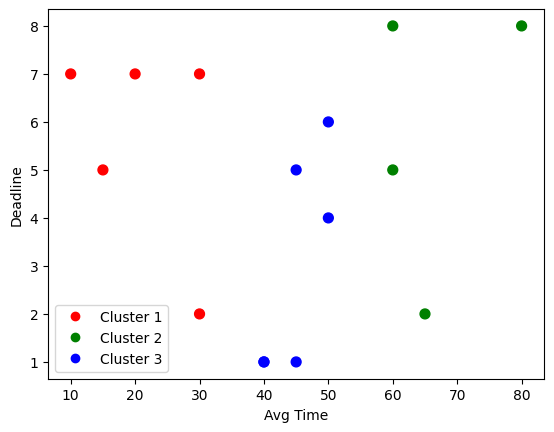

In [ ]:
# Crear una lista de diccionarios a partir del diccionario de tareas
task_dicts = [task.__dict__ for task in dictTasks.values()]

# Crear un marco de datos de pandas a partir de la lista de diccionarios
df = pd.DataFrame(task_dicts)

#creo los colores
colors = ['red', 'green', 'blue']

# Seleccionar las columnas que se utilizarán para el clustering
columns = ['avgTime', 'deadline']
X = df[columns].to_numpy()

# Realizar el clustering con KMeans
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Graficamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in labels], s=50, )
plt.xlabel('Avg Time')
plt.ylabel('Deadline')

# Agregar una leyenda
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', linestyle='') for i, color in enumerate(colors)]
plt.legend(handles=legend_elements)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


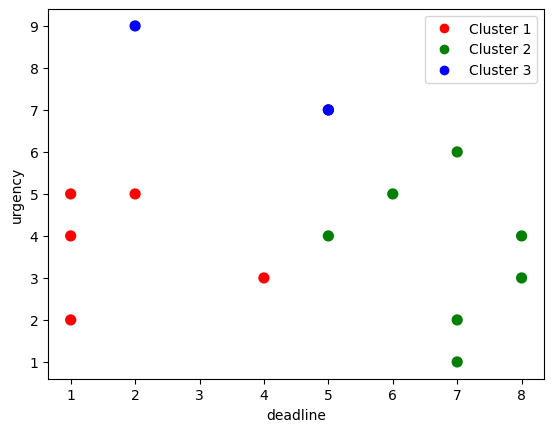

In [ ]:
# Crear una lista de diccionarios a partir del diccionario de tareas
task_dicts = [task.__dict__ for task in dictTasks.values()]

# Crear un marco de datos de pandas a partir de la lista de diccionarios
df = pd.DataFrame(task_dicts)

#creo los colores
colors = ['red', 'green', 'blue']

# Seleccionar las columnas que se utilizarán para el clustering
columns = ['deadline', 'urgency']
X = df[columns].to_numpy()

# Realizar el clustering con KMeans
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# Graficamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in labels], s=50, )
plt.xlabel('deadline')
plt.ylabel('urgency')

# Agregar una leyenda
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', linestyle='') for i, color in enumerate(colors)]
plt.legend(handles=legend_elements)

plt.show()

# Prueba de predicción de tiempo real vs tiempo precalculado que toman las tareas

Para crear un modelo de regresión que prediga la duración real de una tarea, primero debemos cargar los datos de entrenamiento y prueba en Python.

In [ ]:
# Cargamos los datos de entrenamiento y prueba en dataframes
train_data = pd.read_csv("agentTaskLog.csv")
test_data = pd.read_csv("agentTaskList.csv")


A continuación, debemos limpiar y preprocesar los datos para asegurarnos de que sean adecuados para el modelo. Esto incluye eliminar cualquier dato innecesario o faltante, convertir los datos categóricos en valores numéricos y normalizar los datos para que estén en la misma escala.

In [ ]:
# Asegurarse de que las columnas a eliminar estén presentes en ambos conjuntos de datos
cols_to_drop = ["TaskID", "Name", "Parent", "Location", "Involves", "BestOn"]
train_data = train_data.reindex(columns=train_data.columns.tolist() + cols_to_drop)
test_data = test_data.reindex(columns=test_data.columns.tolist() + cols_to_drop)

# Eliminar columnas innecesarias para la predicción
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

# Eliminar columnas adicionales en el conjunto de datos de prueba que no están presentes en el conjunto de datos de entrenamiento
cols_to_drop_extra = ["timeEnds", "dayOfWeek"]
train_data = train_data.drop(cols_to_drop_extra, axis=1)

# Convertir las columnas categóricas en valores numéricos usando one-hot encoding
train_data = pd.get_dummies(train_data, columns=[ "IsHobby" ])
test_data = pd.get_dummies(test_data, columns=[ "IsHobby" ])

# Normalizar los datos usando la biblioteca Scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
train_data

,TaskType,AvgTime,Urgency,TimeStart,Deadline,Recurrency,IsHobby_False,IsHobby_True
0,1,40,5,480,1,7,1,0
1,3,50,6,530,1,7,1,0
2,4,65,9,600,2,2,1,0
3,1,40,4,720,1,7,1,0
4,1,40,5,485,1,7,1,0
5,2,45,2,525,1,6,1,0
6,7,20,1,600,7,2,0,1
7,2,60,4,640,4,3,1,0
8,1,55,3,730,1,7,1,0
9,4,60,8,800,3,4,1,0


In [ ]:
test_data

,TaskType,AvgTime,Urgency,TimeStart,Deadline,Recurrency,IsHobby_False,IsHobby_True
0,1,40,5,480,1,7,1,0
1,2,45,2,525,1,6,1,0
2,3,30,5,530,2,7,1,0
3,4,60,7,590,5,5,1,0
4,4,65,9,600,2,2,1,0
5,5,10,2,540,7,4,1,0
6,6,15,7,605,5,2,1,0
7,1,40,4,720,1,7,1,0
8,5,50,3,630,4,5,1,0
9,7,20,1,660,7,2,0,1


In [ ]:
train_data[["AvgTime", "Urgency", "Recurrency", "Deadline"]] = scaler.fit_transform(train_data[["AvgTime", "Urgency", "Recurrency", "Deadline"]])
test_data[["AvgTime", "Urgency", "Recurrency", "Deadline"]] = scaler.transform(test_data[["AvgTime", "Urgency", "Recurrency", "Deadline"]])

Una vez que los datos estén preparados, podemos entrenar el modelo de regresión. Usamos la biblioteca Scikit-learn para crear y ajustar el modelo a los datos de entrenamiento.

In [ ]:
# Creamos el modelo de regresión lineal
model = LinearRegression()

# Seleccionamos las columnas de características y la columna objetivo en los datos de entrenamiento
X_train = train_data.drop(["AvgTime"], axis=1)
y_train = train_data["AvgTime"]

# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

Finalmente, podemos utilizar el modelo entrenado para hacer predicciones sobre los datos de prueba. Podemos seleccionar las mismas columnas de características en los datos de prueba y usar el método predict() del modelo para hacer predicciones.

In [ ]:
# Seleccionamos las columnas de características en los datos de prueba
X_test = test_data.drop(["AvgTime"], axis=1)

# Hacemos predicciones sobre los datos de prueba
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([-0.5733763 , -0.9763492 , -0.69200461, -0.32320986,  1.40902181,
       -1.89137162,  0.26601077, -0.13232488, -0.95853833, -0.58268628,
       -0.65450219, -0.538609  ,  0.22297996, -0.69064389, -0.59758016])

Ahora tendremos un array y_pred con las predicciones para la duración de cada tarea en la base de prueba. Para evaluar la calidad del modelo, podemos comparar las predicciones con los valores reales de duración en la base de prueba.

Una métrica comúnmente usada para evaluar modelos de regresión es el coeficiente de determinación R2. Este coeficiente mide la proporción de la varianza en los datos que es explicada por el modelo. Un valor de R2 cercano a 1 indica que el modelo ajusta bien a los datos, mientras que un valor cercano a 0 indica que el modelo no explica bien la varianza en los datos.

Podemos calcular el valor de R2 para nuestro modelo usando la función r2_score de la biblioteca scikit-learn:

In [ ]:
y_true = test_data["AvgTime"]

# comparar los valores reales normalizados con los valores predichos
r2 = r2_score(y_true, y_pred)
print('R2 score:', r2)


R2 score: 0.23049686074912712


El valor del R2 score es un número entre 0 y 1 que indica cuánta varianza en la variable objetivo (en este caso, la columna "AvgTime" en los datos de prueba) se puede explicar por las variables predictoras (las otras columnas en los datos). Cuanto mayor sea el R2 score, mejor será la capacidad del modelo para predecir los valores de la variable objetivo. En este caso, el R2 score obtenido es de 0.23, lo que sugiere que el modelo no explica muy bien la varianza en los datos y tiene un desempeño limitado en la predicción de la variable objetivo.

También podemos visualizar los resultados del modelo usando un gráfico de dispersión. En este gráfico, podemos representar en el eje x los valores reales de duración y en el eje y las predicciones del modelo. Idealmente, los puntos deberían estar alineados con la línea diagonal, lo que indicaría que las predicciones coinciden con los valores reales.

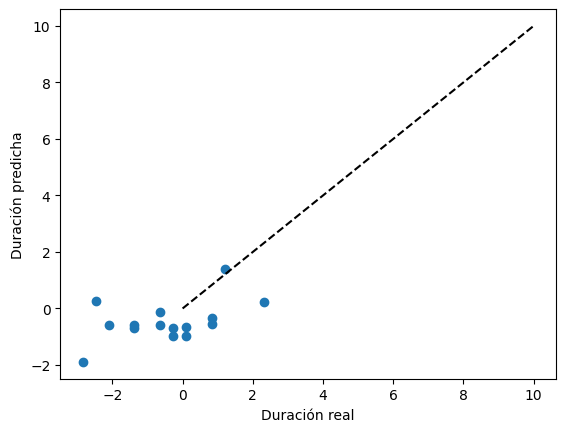

In [ ]:
plt.scatter(y_true, y_pred)
plt.plot([0, 10], [0, 10], '--k')
plt.xlabel('Duración real')
plt.ylabel('Duración predicha')
plt.show()

# Optimizando el cálculo de la urgencia

In [ ]:
# Recálculo de la urgencia.

def findUrgencyGroup(agentTaskLog: pd.DataFrame) -> pd.DataFrame:
    """Metodo para hallar tipo de urgencia mediante cluster KMeans"""
    
    def encodeCategorical(agentTaskLog: pd.DataFrame):
        dfEncoded = agentTaskLog.copy()
        #One hot encoding o label encoding a columns str del set de datos
        dfEncoded["EncodedLocation"] = LabelEncoder().fit_transform(dfEncoded["Location"])
        dfEncoded["EncodedIsHobby"] = dfEncoded["IsHobby"].apply(lambda x: 1 if x else 0)
        dfEncoded["EncodedBestOn"] = LabelEncoder().fit_transform(dfEncoded["BestOn"])
        return dfEncoded
    
    
    clustersDf = agentTaskLog.copy() #copio dataframe de entrada para no sobreescribirlo
    clustersDf = encodeCategorical(clustersDf)
    X = clustersDf[["AvgTime","Deadline","EncodedLocation","EncodedIsHobby"]]
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    clustersDf["Group"] = kmeans.labels_
    
    print(f"Silhouette score of KMeans: {silhouette_score(X,kmeans.labels_)}")
    return clustersDf[["AvgTime","Deadline","EncodedLocation","EncodedIsHobby","Urgency","Group"]]


def predictTaskUrgency(clusters_df:pd.DataFrame) -> pd.DataFrame:
    def testSVM(X,Y) -> dict:
        svr = SVR()
        svr.fit(X,Y) #entrenamiento del modelo
        svrPrediction = svr.predict(X)
        r2 = r2_score(Y, svrPrediction) #r2 del modelo
        mseMetric = mse(Y,svrPrediction)
        return {
            "r2":r2,
            "mse":mseMetric,
            "prediction":svrPrediction
        }


    def testLinearRegression(X,Y) -> dict:
        linearRegression = LinearRegression()
        linearRegression.fit(X,Y) #entrenamiento del modelo
        lrPrediction = linearRegression.predict(X)
        r2 = r2_score(Y,lrPrediction)
        mseMetric = mse(Y,lrPrediction)
        return {
            "r2":r2,
            "mse":mseMetric,
            "prediction":lrPrediction
        }
    
    def appendToDataFrameMetrics(urgencyDf:pd.DataFrame, mse:float, r2:float) -> pd.DataFrame:
        metricsDf = urgencyDf.copy()
        metricsDf["r2Metric"] = r2
        metricsDf["mseMetric"] = mse
        return metricsDf    
    
    
    urgencyDf = clusters_df.copy() #copio dataframe de entrada para no sobreescribirlo
    dataScaler = StandardScaler()
    trainData = pd.DataFrame( #normalizar los datos de entrada
        columns=clusters_df.columns,
        data = dataScaler.fit_transform(urgencyDf)
    )
    
    X = trainData.drop(columns = ["Urgency"])
    Y = trainData["Urgency"]
    lrResults = testLinearRegression(X,Y)
    svmResults = testSVM(X,Y)
    XLr = X
    XLr["Urgency"] = lrResults["prediction"]
    XLr = pd.DataFrame(
        columns= urgencyDf.columns,
        data = dataScaler.inverse_transform(XLr)
        )
    XSvm = X
    XSvm["Urgency"] = svmResults["prediction"]
    XSvm = pd.DataFrame(
        columns= urgencyDf.columns,
        data = dataScaler.inverse_transform(XSvm) 
    )

    #si el r2 de ambos es igual buscar el modelo que menos tenga mse
    if lrResults["r2"] == svmResults["r2"]: 
        if lrResults["mse"] < svmResults["mse"]: #retorno prediccion del SVM
            urgencyDf = appendToDataFrameMetrics(XSvm,
                                                 svmResults["mse"],
                                                 svmResults["r2"])
            return urgencyDf
        #retorno prediccion de la regresion lineal
        urgencyDf = appendToDataFrameMetrics(XLr,
                                            lrResults["mse"],
                                            lrResults["r2"])
        return urgencyDf
    elif lrResults["r2"] < svmResults["r2"]:
        urgencyDf = appendToDataFrameMetrics(XSvm,
                                            svmResults["mse"],
                                            svmResults["r2"])
        return urgencyDf
    urgencyDf = appendToDataFrameMetrics(XLr,
                                        lrResults["mse"],
                                        lrResults["r2"])
    return urgencyDf

df = pd.read_csv("./agentTaskLog.csv")
clustersDf = findUrgencyGroup(df)
urgencyDf = predictTaskUrgency(clustersDf)

urgencyDf    

Silhouette score of KMeans: 0.535974272590046


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AvgTime,Deadline,EncodedLocation,EncodedIsHobby,Urgency,Group,r2Metric,mseMetric
0,40.0,1.0,1.0,0.0,7.451379,0.445814,0.664179,0.335821
1,50.0,1.0,1.0,0.0,2.589655,0.789028,0.664179,0.335821
2,65.0,2.0,0.0,0.0,2.589655,1.069844,0.664179,0.335821
3,40.0,1.0,4.0,0.0,7.451379,0.240239,0.664179,0.335821
4,40.0,1.0,1.0,0.0,7.451379,0.445814,0.664179,0.335821
5,45.0,1.0,1.0,0.0,7.451379,0.463092,0.664179,0.335821
6,20.0,7.0,1.0,1.0,7.451379,-0.276924,0.664179,0.335821
7,60.0,4.0,1.0,0.0,2.589655,1.077328,0.664179,0.335821
8,55.0,1.0,4.0,0.0,2.589655,0.134126,0.664179,0.335821
9,60.0,3.0,1.0,0.0,2.589655,1.063043,0.664179,0.335821


In [ ]:

# Definir variables de entrada y salida
urgencia = ctrl.Antecedent(np.arange(1, 11, 1), 'urgencia')
prioridad = ctrl.Consequent(np.arange(0, 11, 1), 'prioridad')

# Definir los conjuntos difusos y las funciones de pertenencia correspondientes
urgencia['muy_baja'] = fuzz.trimf(urgencia.universe, [1, 1, 3])
urgencia['baja'] = fuzz.trimf(urgencia.universe, [1, 3, 5])
urgencia['media'] = fuzz.trimf(urgencia.universe, [3, 5, 7])
urgencia['alta'] = fuzz.trimf(urgencia.universe, [5, 7, 9])
urgencia['muy_alta'] = fuzz.trimf(urgencia.universe, [7, 10, 10])

prioridad['baja'] = fuzz.trimf(prioridad.universe, [0, 0, 5])
prioridad['media'] = fuzz.trimf(prioridad.universe, [0, 5, 10])
prioridad['alta'] = fuzz.trimf(prioridad.universe, [5, 10, 10])

# Definir las reglas difusas
regla1 = ctrl.Rule(urgencia['muy_baja'], prioridad['baja'])
regla2 = ctrl.Rule(urgencia['baja'], prioridad['baja'])
regla3 = ctrl.Rule(urgencia['media'], prioridad['media'])
regla4 = ctrl.Rule(urgencia['alta'], prioridad['alta'])
regla5 = ctrl.Rule(urgencia['muy_alta'], prioridad['alta'])

# Definir el sistema de control difuso
sistema = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5])
asignar_prioridad = ctrl.ControlSystemSimulation(sistema)

def escribirPrioridad(prioridad):
    # Imprimir la prioridad asignada en forma de cadena de texto
    if prioridad_tarea <= 2.5:
        print("La prioridad de la tarea es baja")
    elif prioridad_tarea <= 7.5:
        print("La prioridad de la tarea es media")
    else:
        print("La prioridad de la tarea es alta")

priorityList = []
for i,urgency in enumerate(urgencyDf["Urgency"]):
    asignar_prioridad.input['urgencia'] = urgency
    asignar_prioridad.compute()
    prioridad_tarea = asignar_prioridad.output['prioridad']
    priorityList.append(prioridad_tarea)
urgencyDf["Priority"] = priorityList


In [ ]:
urgencyDf

,AvgTime,Deadline,EncodedLocation,EncodedIsHobby,Urgency,Group,r2Metric,mseMetric,Priority
0,40.0,1.0,1.0,0.0,7.451379,0.445814,0.664179,0.335821,8.264072
1,50.0,1.0,1.0,0.0,2.589655,0.789028,0.664179,0.335821,1.724882
2,65.0,2.0,0.0,0.0,2.589655,1.069844,0.664179,0.335821,1.724882
3,40.0,1.0,4.0,0.0,7.451379,0.240239,0.664179,0.335821,8.264072
4,40.0,1.0,1.0,0.0,7.451379,0.445814,0.664179,0.335821,8.264072
5,45.0,1.0,1.0,0.0,7.451379,0.463092,0.664179,0.335821,8.264072
6,20.0,7.0,1.0,1.0,7.451379,-0.276924,0.664179,0.335821,8.264072
7,60.0,4.0,1.0,0.0,2.589655,1.077328,0.664179,0.335821,1.724882
8,55.0,1.0,4.0,0.0,2.589655,0.134126,0.664179,0.335821,1.724882
9,60.0,3.0,1.0,0.0,2.589655,1.063043,0.664179,0.335821,1.724882


## Informacion de habitos de uso de redes sociales

Queremos monitorear el uso de redes sociales del usuario para informarle que tanto tiempo esta gastando en esta actividad y a que hora hace uso de ella con mayor frecuencia. 

In [ ]:

# Aurenticacion con API twitter v2.0
"""
# Autenticación con las credenciales de la API de Twitter
consumer_key = 'SViGIvJnGdabUq1jdfu01iwDF'
consumer_secret = 'k0d9KUzYVqTklHkQm2Cpc5uVN1BDRFckYeGl4qgBOgnKmcKxDf'
access_token = '1580914511254589441-bRfWqmuKGswDqqdHK88X0zQ55xMIN7'
access_token_secret = 'VNoA640kEEiFZ1UCWfIIuh0TRuDIDWmIly5uwORhg4eD2'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Inicializar la API de Tweepy
api = tweepy.API(auth)

# Obtener los últimos 200 tweets del usuario especificado
tweets = api.user_timeline(screen_name='shakira', count=200)
#tweets = api.get_user_timeline(screen_name='shakira', count=200)

# Crear un dataframe temporal para almacenar los datos de los tweets!!
df = pd.DataFrame()

# Iteramos a través de los tweets y agregar los datos relevantes al dataframe
for tweet in tweets:
    df = df.append(pd.Series([tweet.status_id, tweet.created_at, tweet.text]), ignore_index=True)

# Hay que convertir la columna de fechas a formato de hora
df['created_at'] = pd.to_datetime(df['created_at']).dt.time

# Agregamos una columna con la hora del tweet ???
df['hour'] = [time.hour for time in df['created_at']]

# Contar cuántos tweets se publicaron en cada hora del día por el user
counts = df.groupby(['hour']).count()

# Encontrar la hora con la mayoría de tweets
most_common_hour = counts['text'].idxmax()

# Imprimir la hora con más tweets ! -> habito
print(f"La hora en que se publican más tweets es {most_common_hour}:00")
print(f"recuerde usar las redes sociales con moderación para hacer un uso eficiente de su tiempo libre!")

"""

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Lectura de datos de csv ya que la API es paga
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/'
#url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/datos_tweets_%40elonmusk.csv'
tweets   = pd.read_csv(url + "datos_tweets_@elonmusk.csv", nrows=300)
print('Número de tweets @elonmusk: ' + str(tweets.shape[0]))


# Lectura de datos de csv ya que la API es paga
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/'
tweets = pd.read_csv(url + "datos_tweets_@elonmusk.csv")
print('Número de tweets @elonmusk: ' + str(tweets.shape[0]))

# Crear un dataframe temporal para almacenar los datos de los tweets!!
df = pd.DataFrame(columns=['status_id', 'created_at', 'text'])

# Iteramos a través de las filas del dataframe y agregar los datos relevantes al dataframe temporal
for i, row in tweets.iterrows():
    df = df.append({'status_id': row['status_id'], 
                    'created_at': row['created_at'], 
                    'text': row['text']}, ignore_index=True)

# Hay que convertir la columna de fechas a formato de hora
df['created_at'] = pd.to_datetime(df['created_at']).dt.time

# Agregamos una columna con la hora del tweet ???
df['hour'] = [time.hour for time in df['created_at']]

# Contar cuántos tweets se publicaron en cada hora del día por el user
counts = df.groupby(['hour']).count()

# Encontrar la hora con la mayoría de tweets
most_common_hour = counts['text'].idxmax()

# Imprimir la hora con más tweets ! -> habito
print(f"La hora en que se publican más tweets es {most_common_hour}:00")
print(f"recuerde usar las redes sociales con moderación para hacer un uso eficiente de su tiempo libre!")




Número de tweets @elonmusk: 300
Número de tweets @elonmusk: 2678
La hora en que se publican más tweets es 1:00
recuerde usar las redes sociales con moderación para hacer un uso eficiente de su tiempo libre!
